In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Load dataset
df = pd.read_csv('combined.csv')  # Replace with your actual dataset path
# drop the non-numeric columns
df_numeric = df.select_dtypes(include=np.number)

display(df_numeric.head())

,%Vbur_C1_2.0Å_Boltz,%Vbur_C1_2.0Å_Vbur_min,%Vbur_C1_2.0Å_low_E,%Vbur_C1_2.0Å_max,%Vbur_C1_2.0Å_min,%Vbur_C1_2.5Å_Boltz,%Vbur_C1_2.5Å_Vbur_min,%Vbur_C1_2.5Å_low_E,%Vbur_C1_2.5Å_max,%Vbur_C1_2.5Å_min,...,μ_Boltz,μ_Vbur_min,μ_low_E,μ_max,μ_min,ω_Boltz,ω_Vbur_min,ω_low_E,ω_max,ω_min
0,90.705708,90.705708,90.705708,90.705708,90.705708,74.778617,74.778617,74.778617,74.778617,74.778617,...,-0.148205,-0.148205,-0.148205,-0.148205,-0.148205,0.038490,0.03849,0.03849,0.03849,0.03849
1,95.180139,95.180139,95.180139,95.180139,95.180139,85.671962,85.671962,85.671962,85.671962,85.671962,...,-0.158740,-0.158740,-0.158740,-0.158740,-0.158740,0.041650,0.04165,0.04165,0.04165,0.04165
2,95.716038,95.716038,95.716038,95.716038,95.716038,85.748470,85.748470,85.748470,85.748470,85.748470,...,-0.166500,-0.166500,-0.166500,-0.166500,-0.166500,0.044680,0.04468,0.04468,0.04468,0.04468
3,94.741043,94.731405,94.731405,94.976756,94.731405,84.651442,84.703412,84.703412,85.382211,84.612254,...,-0.158143,-0.158135,-0.158135,-0.157120,-0.158165,0.049803,0.04981,0.04981,0.04981,0.04817
4,95.276989,95.276989,95.276989,95.276989,95.276989,85.032231,85.032231,85.032231,85.032231,85.032231,...,-0.182130,-0.182130,-0.182130,-0.182130,-0.182130,0.054590,0.05459,0.05459,0.05459,0.05459


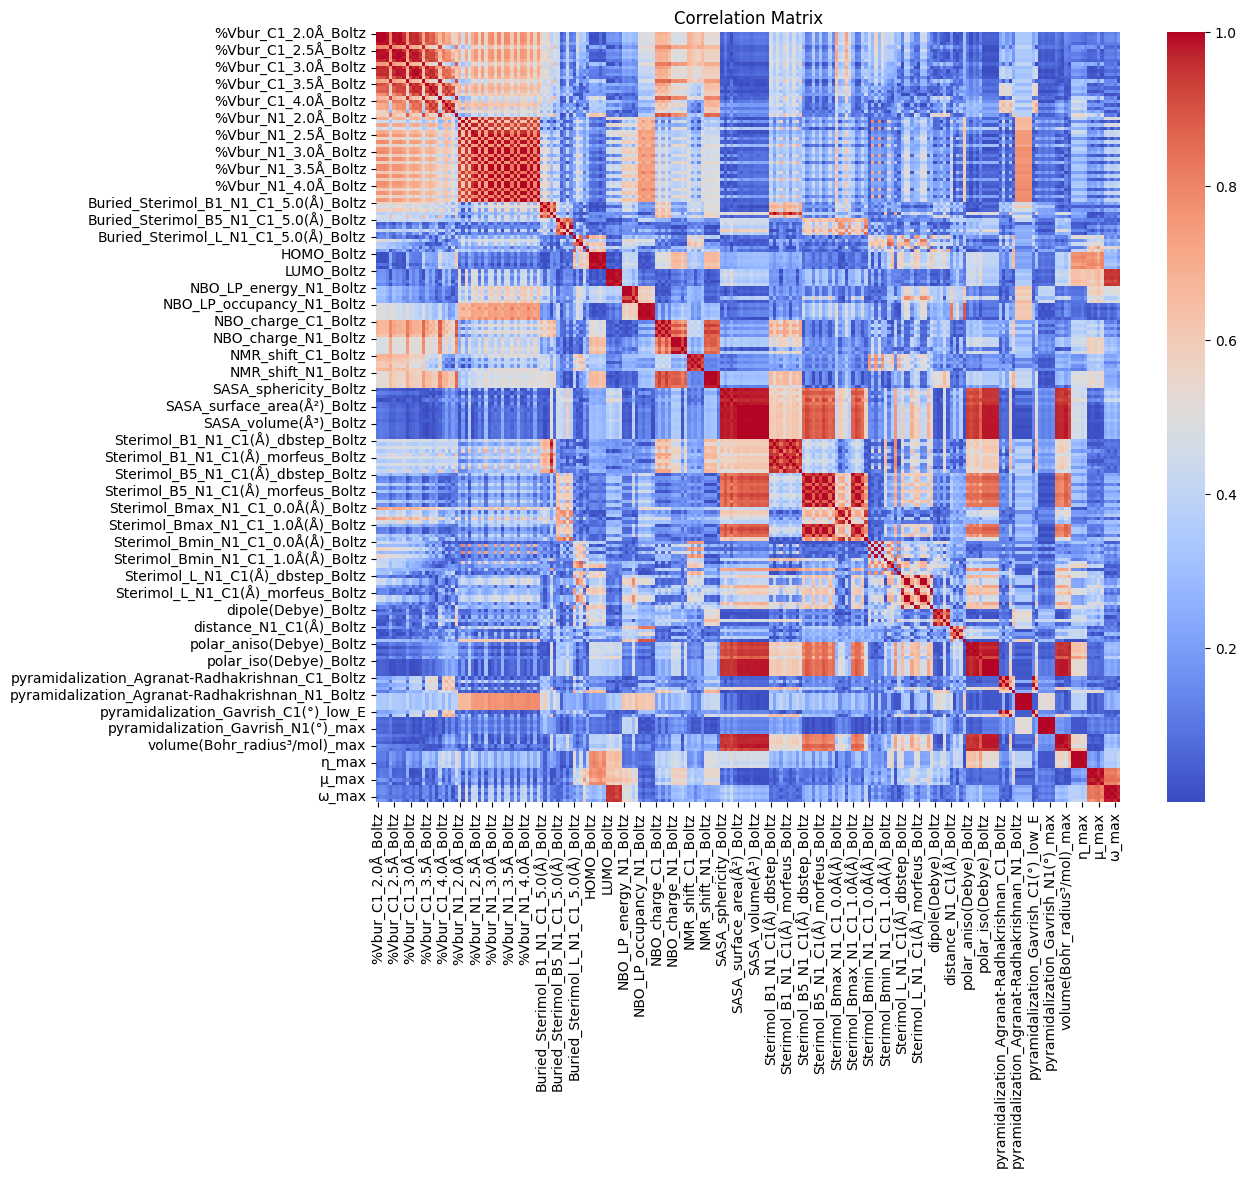

In [13]:
# calculate the correlation matrix
corr_matrix = df_numeric.corr(method='pearson').abs()

# display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

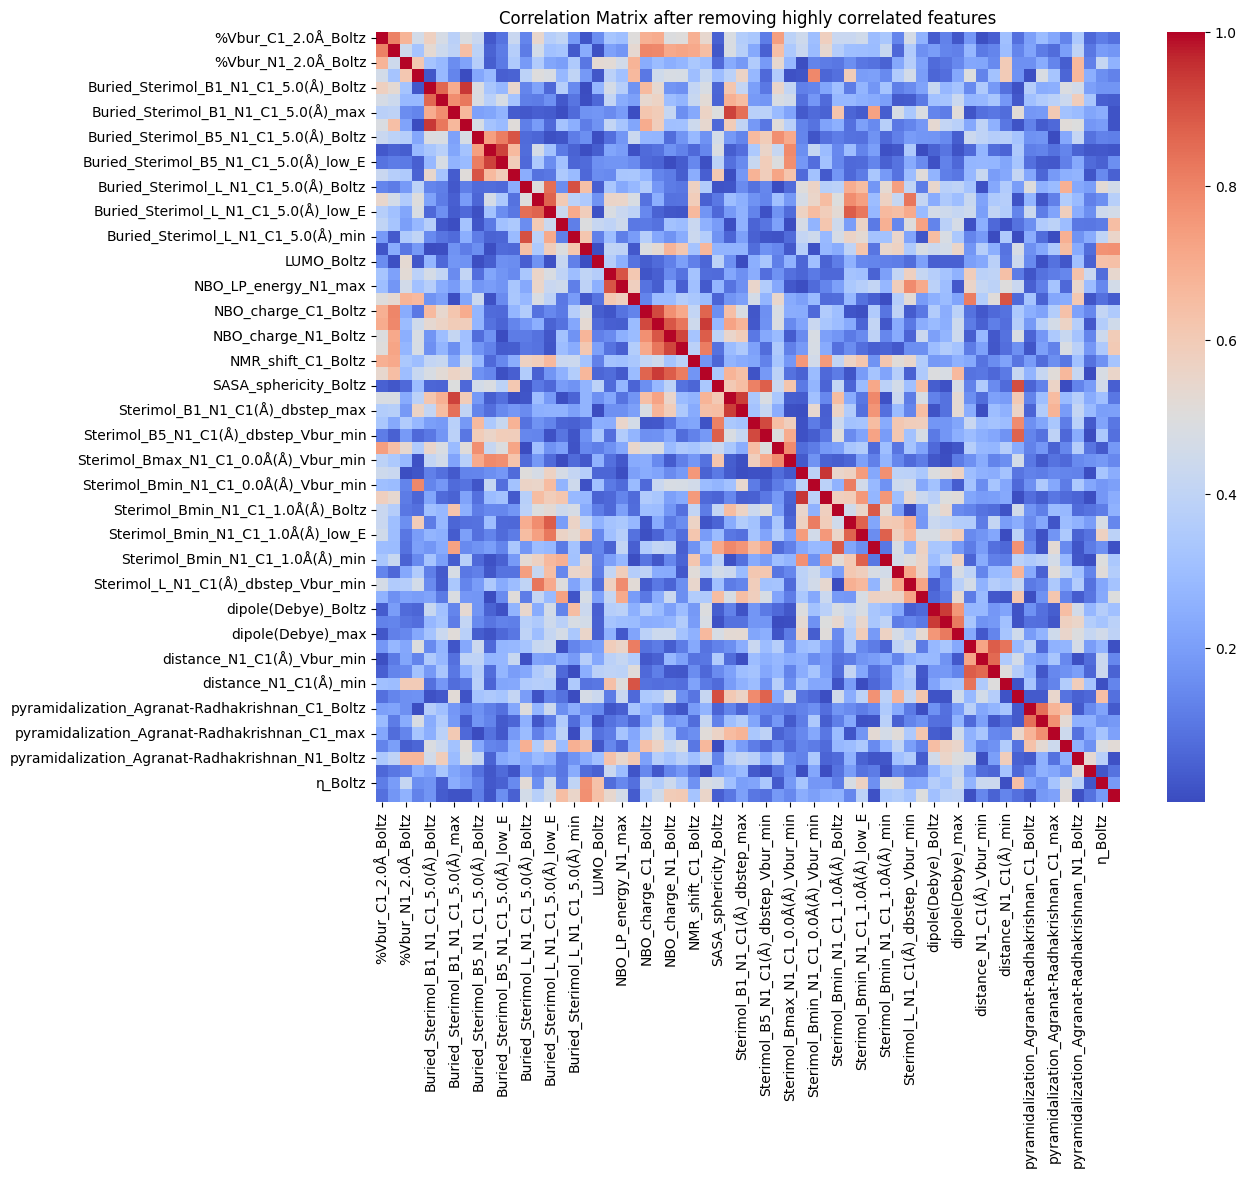

In [14]:
# Remove highly correlated features
threshold = 0.95

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# Drop features
df_numeric_low_corr = df_numeric.drop(to_drop, axis=1)

# display the correlation matrix after removing highly correlated features
corr_matrix_low_corr = df_numeric_low_corr.corr(method='pearson').abs()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_low_corr, cmap="coolwarm")
plt.title('Correlation Matrix after removing highly correlated features')
plt.show()

Shape of descriptors file before removing parameters with R^2 > 0.95 : (13, 227)
Shape of descriptors file after removing parameters with R^2 > 0.95 : (13, 62)


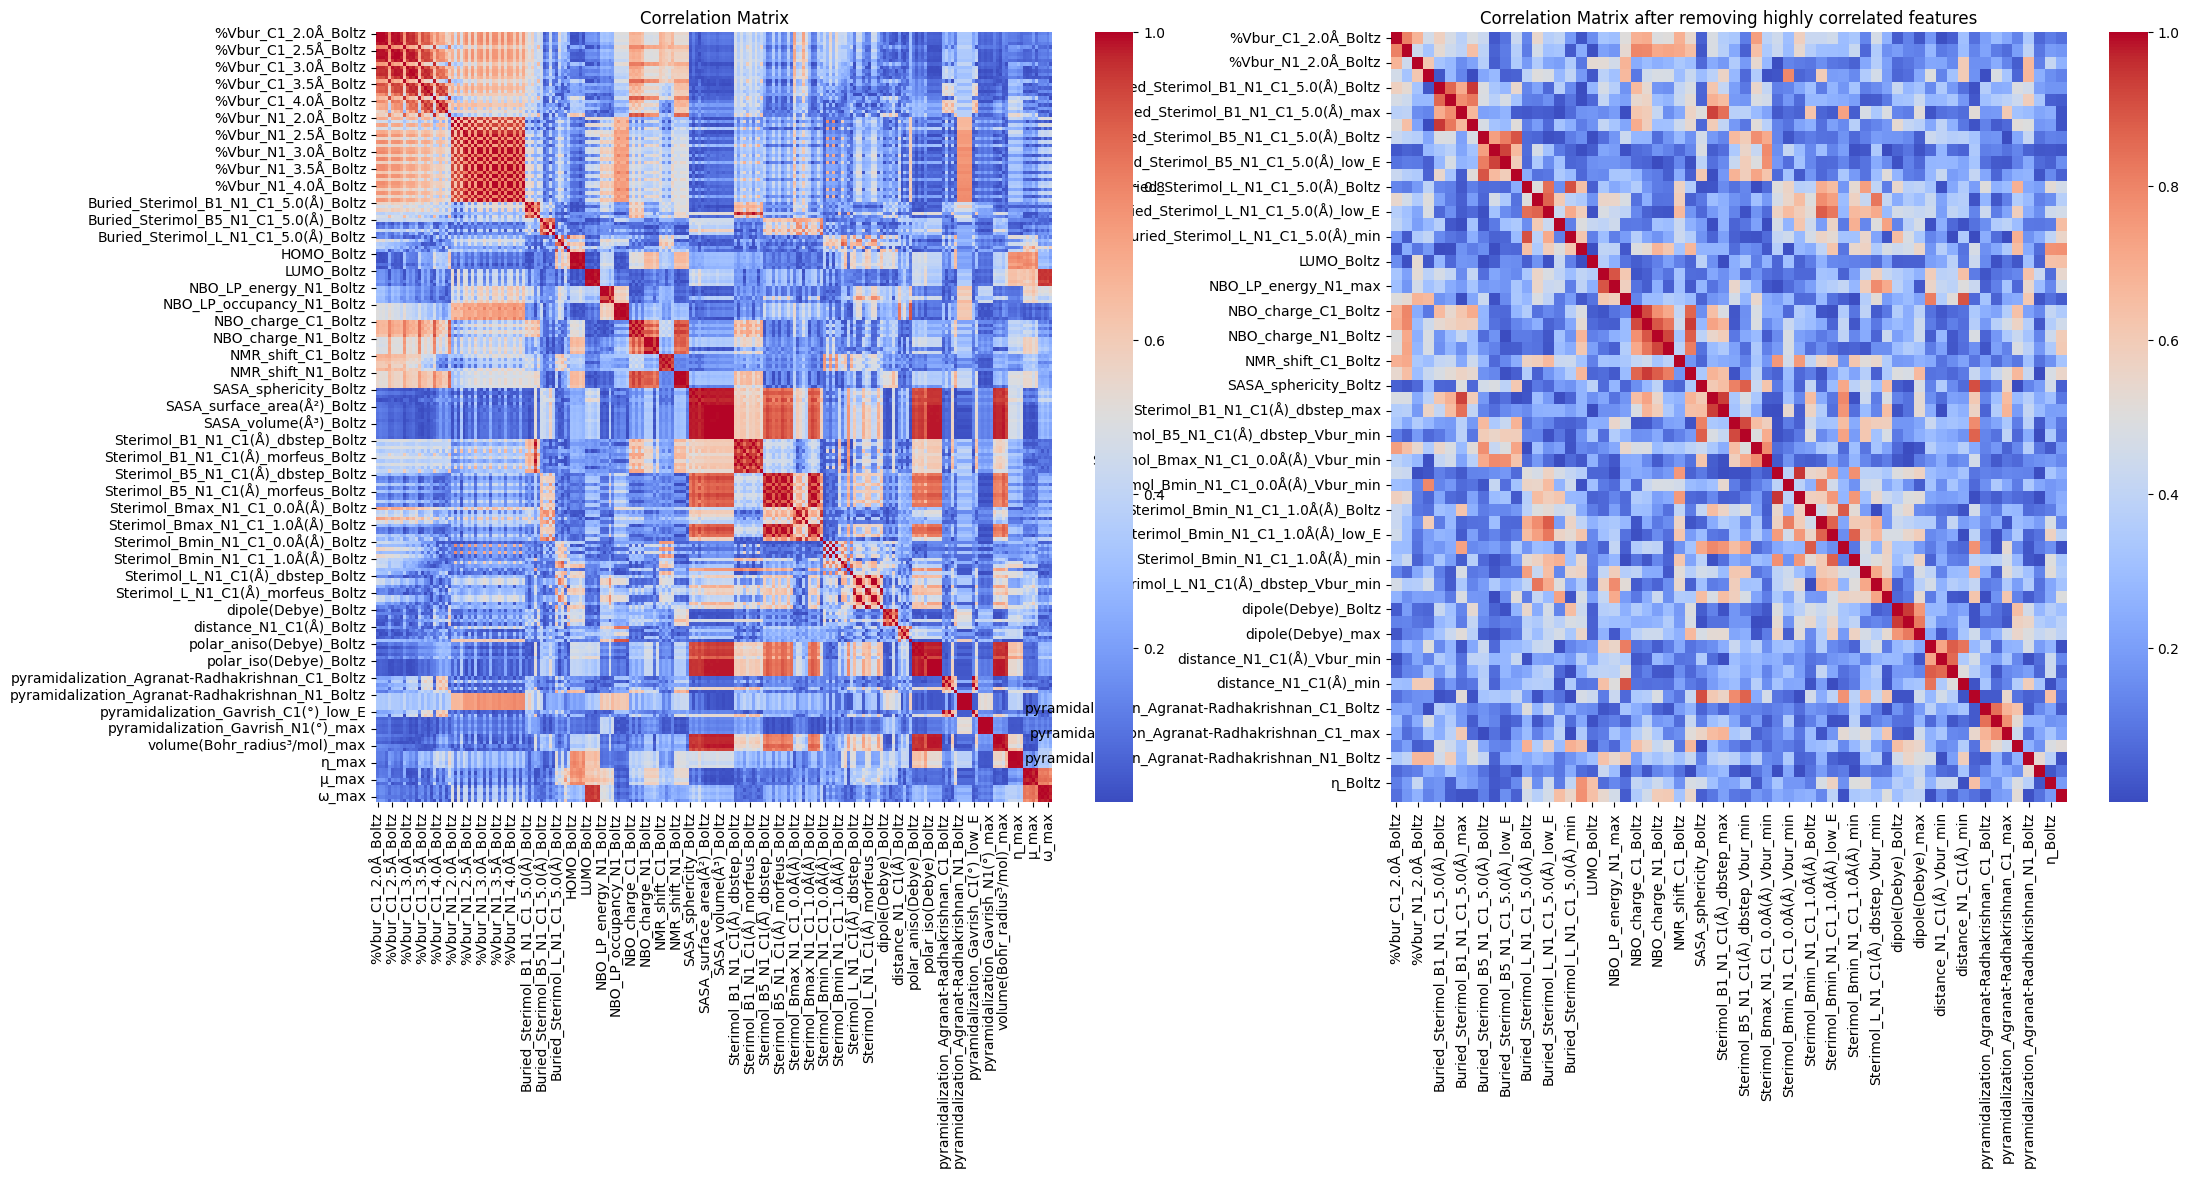

In [15]:
# plot both correlation matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

sns.heatmap(corr_matrix, cmap="coolwarm", ax=axs[0])
axs[0].set_title("Correlation Matrix")

print(
    f"Shape of descriptors file before removing parameters with R^2 > {threshold} :",
    df_numeric.shape,
)

sns.heatmap(corr_matrix_low_corr, cmap="coolwarm", ax=axs[1])
axs[1].set_title("Correlation Matrix after removing highly correlated features")

print(
    f"Shape of descriptors file after removing parameters with R^2 > {threshold} :",
    df_numeric_low_corr.shape,
)

plt.show()

In [16]:
# Find desriptors that are correlated. Enter desired feature
feature = 'HOMO_Boltz'

# display feature that is highly correlated to this feature
corr_features = corr_matrix[feature].loc[abs(corr_matrix[feature]) > threshold]
print(corr_features)

HOMO_Boltz       1.000000
HOMO_Vbur_min    0.995464
HOMO_low_E       0.999917
HOMO_max         0.983800
HOMO_min         0.995514
Name: HOMO_Boltz, dtype: float64


In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_numeric_low_corr_scaled = scaler.fit_transform(df_numeric_low_corr)

# Convert the scaled data back to a DataFrame
df_numeric_low_corr_scaled = pd.DataFrame(df_numeric_low_corr_scaled, columns=df_numeric_low_corr.columns)

# Display the scaled DataFrame
display(df_numeric_low_corr_scaled.head())

,%Vbur_C1_2.0Å_Boltz,%Vbur_C1_2.0Å_min,%Vbur_N1_2.0Å_Boltz,%Vbur_N1_2.0Å_Vbur_min,Buried_Sterimol_B1_N1_C1_5.0(Å)_Boltz,Buried_Sterimol_B1_N1_C1_5.0(Å)_Vbur_min,Buried_Sterimol_B1_N1_C1_5.0(Å)_max,Buried_Sterimol_B1_N1_C1_5.0(Å)_min,Buried_Sterimol_B5_N1_C1_5.0(Å)_Boltz,Buried_Sterimol_B5_N1_C1_5.0(Å)_Vbur_min,...,distance_N1_C1(Å)_min,polar_aniso(Debye)_Boltz,pyramidalization_Agranat-Radhakrishnan_C1_Boltz,pyramidalization_Agranat-Radhakrishnan_C1_Vbur_min,pyramidalization_Agranat-Radhakrishnan_C1_max,pyramidalization_Agranat-Radhakrishnan_C1_min,pyramidalization_Agranat-Radhakrishnan_N1_Boltz,pyramidalization_Gavrish_N1(°)_Boltz,η_Boltz,μ_Boltz
0,-1.853126,-1.505462,-1.061982,-0.777129,-1.175084,-1.526325,-1.248999,-1.004178,0.295608,0.325142,...,0.183055,-0.571167,-0.569883,-0.631605,-0.795852,-0.423638,0.666430,-0.011476,0.211707,1.024755
1,0.516224,0.686491,-0.380996,-0.416838,-0.004122,-0.266458,-0.368485,0.116132,-1.930428,-1.555416,...,-1.277225,-0.886378,-0.659333,-0.709214,-0.863835,-0.545400,0.669374,-0.027394,0.906804,0.176954
2,0.799999,0.949019,-0.543004,-0.502552,0.106399,-0.147546,-0.285379,0.221871,0.313483,0.340243,...,1.442599,-0.706850,-0.658573,-0.708555,-0.863257,-0.544365,0.669374,-0.078244,1.219335,-0.447531
3,0.283709,0.466663,-0.232457,-0.350010,0.537201,0.443256,2.496906,0.469149,0.713043,0.250528,...,0.290184,2.949963,-0.187188,-0.324565,1.856779,0.058078,0.669029,0.052251,-1.175933,0.224996
4,0.567509,0.733936,0.684419,0.146843,2.075338,1.970884,1.195179,2.105639,-0.330458,-0.203760,...,-1.457160,-0.819508,-0.656958,-0.707154,-0.862030,-0.542167,-1.505370,-0.869171,0.958623,-1.705351


In [18]:
# perform PCA in scikit-learn
pca_sklearn = PCA()

# Fit and transform the data
pca_sklearn_result = pca_sklearn.fit_transform(df_numeric_low_corr_scaled)

# Display the PCA result from scikit-learn
print("PCA result using scikit-learn:")
print(pca_sklearn_result)

PCA result using scikit-learn:
[[ 4.79035025e+00 -3.09823214e+00 -2.42419128e+00 -1.33943931e+00
   2.53760028e-01 -3.49439813e-01 -1.17362353e+00 -4.16526815e-01
   1.62581575e+00 -1.20632496e+00 -1.98315158e+00  1.00612481e+00
   5.07793911e-16]
 [-2.25294179e+00 -1.56621303e+00 -3.81663846e+00  6.08749955e-01
   6.50951410e-01 -1.90633325e+00 -2.03203578e+00  9.32571474e-01
   1.27995579e+00 -6.86010735e-01  4.58493881e-01 -1.97697527e+00
   5.07793911e-16]
 [-4.61868690e+00 -4.62596114e+00  4.12730781e+00  4.94243215e+00
   1.44121761e+00  1.02828452e+00  1.38888145e-02 -7.29120457e-01
  -1.13421834e+00 -9.56610017e-01 -6.49571796e-01  9.92687513e-02
   5.07793911e-16]
 [ 2.95129182e+00  6.44759585e+00  6.33564438e+00  1.28064485e+00
  -1.83216127e+00 -2.65304677e+00 -1.29463656e+00  1.00037263e+00
   6.89450502e-01 -3.47943524e-02 -3.62861870e-01 -1.70743502e-01
   5.07793911e-16]
 [-6.93535614e+00 -6.80649124e-01 -1.49554892e+00 -1.89603981e+00
  -3.98747703e+00 -1.82531285e+00 -

In [19]:
# Variance explained by each PC
explained_variance_ratios = pca_sklearn.explained_variance_ratio_

# Variance explained by the first 4 PCs
variance_explained_first_4 = np.sum(explained_variance_ratios[:4])
print(f"Variance explained by the first 4 PCs: {variance_explained_first_4 * 100:.2f}%")

Variance explained by the first 4 PCs: 66.96%
